In [35]:
import tensorflow as tf

cnn = tf.keras.models.load_model('cifar10_accuracy_82v1.h5')

In [36]:
import os
result_dir = 'pred_result'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
    print(result_dir+'is created !')

pred_resultis created !


In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(len(class_names)):
    label_dir = result_dir+'/'+class_names[i]
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
        print(label_dir+' is created !')

unknown_dir = result_dir+'/unknown'
if not os.path.exists(unknown_dir):
        os.mkdir(unknown_dir)
        print(unknown_dir+' is created !')

pred_result/airplane is created !
pred_result/automobile is created !
pred_result/bird is created !
pred_result/cat is created !
pred_result/deer is created !
pred_result/dog is created !
pred_result/frog is created !
pred_result/horse is created !
pred_result/ship is created !
pred_result/truck is created !
pred_result/unknown is created !


In [39]:
import zipfile

with zipfile.ZipFile('./my_test_image.zip','r') as target_file:

    target_file.extractall('my_test_image')

    print('test image is extracted into my_test_image dir !')

test image is extracted into my_test_image dir !


In [40]:
from glob import glob
import cv2

test_image_data_list = glob('my_test_image/*')

src_list = []
img_file_list = []

for idx in range(len(test_image_data_list)):
    src_img = cv2.imread(test_image_data_list[idx], cv2.IMREAD_COLOR)
    src_list.append(src_img)
    img_file_list.append(test_image_data_list[idx].split('/')[1])

In [41]:
dst_list = []

for idx in range(len(src_list)):

    dst_img = cv2.cvtColor(src_list[idx], cv2.COLOR_BGR2RGB)
    dst_img = cv2.resize(dst_img, dsize=(32,32))
    dst_img = dst_img / 255.0

    print(src_list[idx].shape, dst_img.shape)

    dst_list.append(dst_img)

(293, 220, 3) (32, 32, 3)
(150, 200, 3) (32, 32, 3)
(1200, 1200, 3) (32, 32, 3)
(1128, 1504, 3) (32, 32, 3)
(918, 1280, 3) (32, 32, 3)
(802, 1023, 3) (32, 32, 3)
(136, 200, 3) (32, 32, 3)
(1000, 1500, 3) (32, 32, 3)
(560, 560, 3) (32, 32, 3)
(177, 284, 3) (32, 32, 3)
(251, 201, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(2174, 3865, 3) (32, 32, 3)
(697, 1024, 3) (32, 32, 3)
(680, 1023, 3) (32, 32, 3)
(332, 500, 3) (32, 32, 3)


In [54]:
test_image_data_list

['my_test_image/flog.123.jpg',
 'my_test_image/truck.23.jpg',
 'my_test_image/deer.1.webp',
 'my_test_image/bird.21.jpg',
 'my_test_image/fighter.1.jpg',
 'my_test_image/automobile.23.jpg',
 'my_test_image/cat.2.jpg',
 'my_test_image/dog.6331.jpg',
 'my_test_image/dog.4.jpg',
 'my_test_image/ship.234.jpg',
 'my_test_image/dog.3.jpg',
 'my_test_image/cat.9.jpg',
 'my_test_image/horse.1.jpg',
 'my_test_image/house.23.jpg',
 'my_test_image/flog.1.jpg',
 'my_test_image/airplane.1.jpg']

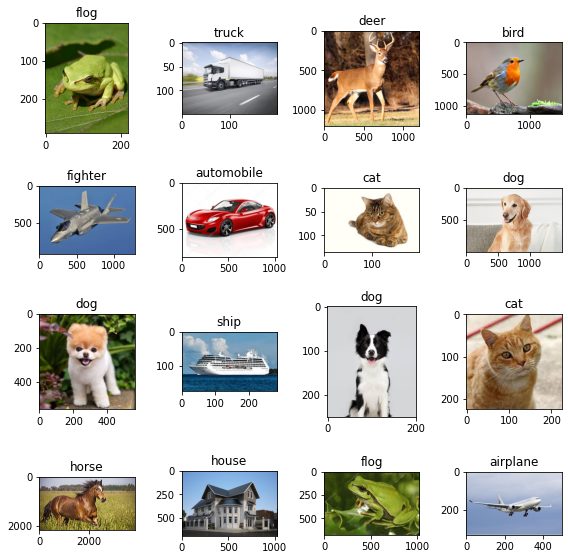

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for idx in range(len(src_list)):
    plt.subplot(4,4,idx+1)
    tmp = cv2.cvtColor(src_list[idx], cv2.COLOR_BGR2RGB)
    plt.title(test_image_data_list[idx].split('/')[1].split('.')[0])
    plt.imshow(tmp)
plt.tight_layout()
plt.show()

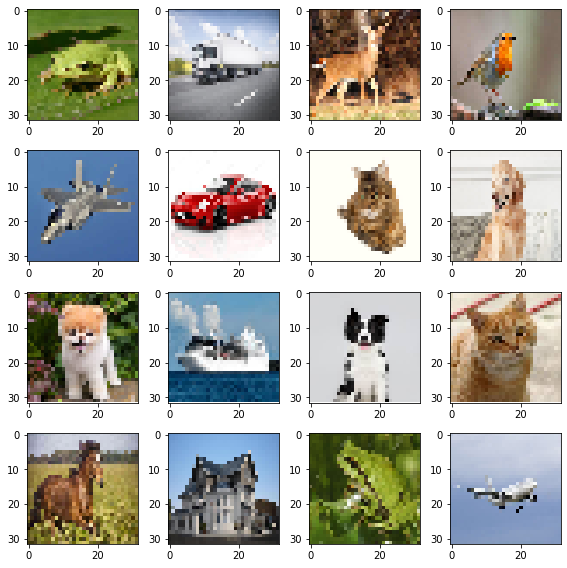

In [43]:
plt.figure(figsize=(8,8))

for idx in range(len(dst_list)):
    plt.subplot(4,4,idx+1)
    plt.imshow(dst_list[idx])
plt.tight_layout()
plt.show()

In [44]:
import numpy as np
test_data = np.array(dst_list)
print(test_data.shape)

(16, 32, 32, 3)


In [45]:
pred = cnn.predict(test_data)
pred.shape

(16, 10)

In [46]:
import shutil
for index in range(len(pred)):
    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())
    if pred[index].max() > 0.5:
        target_path = result_dir+'/'+class_names[class_index]+'/'.strip()
        shutil.copy(test_image_data_list[index], target_path+img_file_list[index])
        print('%s is copied into %s'%(img_file_list[index], target_path))
    else:
        shutil.copy(test_image_data_list[index], unknown_dir+'/'+img_file_list[index])
        print('%s is copied into %s'%(img_file_list[index], unknown_dir+'/'+img_file_list[index]))


prediction =>  frog 0.99999964
flog.123.jpg is copied into pred_result/frog/
prediction =>  truck 0.9158311
truck.23.jpg is copied into pred_result/truck/
prediction =>  deer 0.851458
deer.1.webp is copied into pred_result/deer/
prediction =>  bird 0.9909093
bird.21.jpg is copied into pred_result/bird/
prediction =>  airplane 0.999949
fighter.1.jpg is copied into pred_result/airplane/
prediction =>  automobile 0.67016315
automobile.23.jpg is copied into pred_result/automobile/
prediction =>  cat 0.9993635
cat.2.jpg is copied into pred_result/cat/
prediction =>  dog 0.97040963
dog.6331.jpg is copied into pred_result/dog/
prediction =>  dog 0.9174402
dog.4.jpg is copied into pred_result/dog/
prediction =>  ship 1.0
ship.234.jpg is copied into pred_result/ship/
prediction =>  dog 0.95576715
dog.3.jpg is copied into pred_result/dog/
prediction =>  dog 0.9508884
cat.9.jpg is copied into pred_result/dog/
prediction =>  horse 0.90504473
horse.1.jpg is copied into pred_result/horse/
prediction

In [47]:
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[6 2 3 8 5 4 1 9 0 7]
prediction =>  frog 0.99999964
prediction =>  bird 2.2011298e-07
prediction =>  cat 4.7738887e-08
[9 8 0 1 3 4 2 6 5 7]
prediction =>  truck 0.9158311
prediction =>  ship 0.082457736
prediction =>  airplane 0.0016616707
[4 5 7 6 2 3 9 0 1 8]
prediction =>  deer 0.851458
prediction =>  dog 0.05771787
prediction =>  horse 0.028490987
[2 0 3 5 6 7 4 8 9 1]
prediction =>  bird 0.9909093
prediction =>  airplane 0.008315661
prediction =>  cat 0.0002327055
[0 2 4 8 3 6 5 7 9 1]
prediction =>  airplane 0.999949
prediction =>  bird 3.0131449e-05
prediction =>  deer 2.083956e-05
[1 9 8 0 6 3 5 4 2 7]
prediction =>  automobile 0.67016315
prediction =>  truck 0.32971472
prediction =>  ship 9.559172e-05
[3 5 6 7 2 4 9 0 1 8]
prediction =>  cat 0.9993635
prediction =>  dog 0.00063507323
prediction =>  frog 1.0616955e-06
[5 2 3 7 4 6 0 8 9 1]
prediction =>  dog 0.97040963
prediction =>  bird 0.022851173
prediction =>  cat 0.0063683665
[5 4 3 7 2 6 0 9 1 8]
prediction =>  dog 0.9